<a href="https://colab.research.google.com/github/senchiao/HRRR_plots/blob/main/HRRR_PBLH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install herbie herbie-data xarray cfgrib matplotlib cartopy metpy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import warnings

import herbie
from herbie import Herbie, FastHerbie

In [ ]:
#H = Herbie(
#    "2025-07-30",
#    model="hrrr",
#    product="sfc",
#    fxx=6,
#)
#myFile = H.download(verbose=True)
#print(myFile)

In [ ]:
#H.inventory(searchString='HPBL')

In [ ]:
point_bsv = pd.DataFrame(
    {
        "latitude": [39.05666513412926],
        "longitude": [-76.87568557561814],
        "stid": ["KBSV"],
    }
)
point_irb = pd.DataFrame(
    {
        "latitude": [38.91943100433582],
        "longitude": [-77.02143885023396],
        "stid": ["KIRB"],
    }
)
point_bsv
point_irb

,latitude,longitude,stid
0,38.919431,-77.021439,KIRB


In [ ]:
H_rrr = Herbie("2025-07-29 00:00", model="hrrr", product="sfc")
ds = H_rrr.xarray("HPBL", remove_grib=False)

bsv_point = pd.DataFrame(
    {
        "latitude": [39.05666513412926],
        "longitude": [-76.87568557561814],
        "stid": ["KBSV"],
    }
)
irb_point = pd.DataFrame(
    {
        "latitude": [38.91943100433582],
        "longitude": [-77.02143885023396],
        "stid": ["KIRB"],
    }
)
bsv = ds.herbie.pick_points(bsv_point)
irb = ds.herbie.pick_points(irb_point)
bsv
irb

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local


<xarray.Dataset> Size: 92B
Dimensions:              (point: 1)
Coordinates:
    time                 datetime64[ns] 8B 2025-07-29
    step                 timedelta64[ns] 8B 00:00:00
    surface              float64 8B 0.0
    latitude             (point) float64 8B ...
    longitude            (point) float64 8B ...
    valid_time           datetime64[ns] 8B ...
    gribfile_projection  object 8B None
    point_grid_distance  (point) float64 8B 0.3779
    point_latitude       (point) float64 8B 38.92
    point_longitude      (point) float64 8B -77.02
    point_stid           (point) object 8B 'KIRB'
Dimensions without coordinates: point
Data variables:
    blh                  (point) float32 4B ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /root/data/hrrr/20250729/subset_5eef62ce__hrrr.t...
    search:                  HPBL

In [ ]:
i = []
for date in pd.date_range("2025-07-29", periods=36, freq="1h"):
    ds = Herbie(date).xarray("HPBL", remove_grib=False)
    i.append(
        ds.herbie.pick_points(
            pd.DataFrame(
                {
                    "latitude": [39.05666513412926, 38.91943100433582],
                    "longitude": [-76.87568557561814, -77.02143885023396],
                    "stid": ["KBSV","KIRB"]
                }
            )
        )
    )

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 01:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 02:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 03:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 04:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 05:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 07:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 08:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 09:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2025-Jul-29 10:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ local

/tmp/ipython-input-2108584457.py:2: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  bsv_ts = xr.concat(i, dim="valid_time")


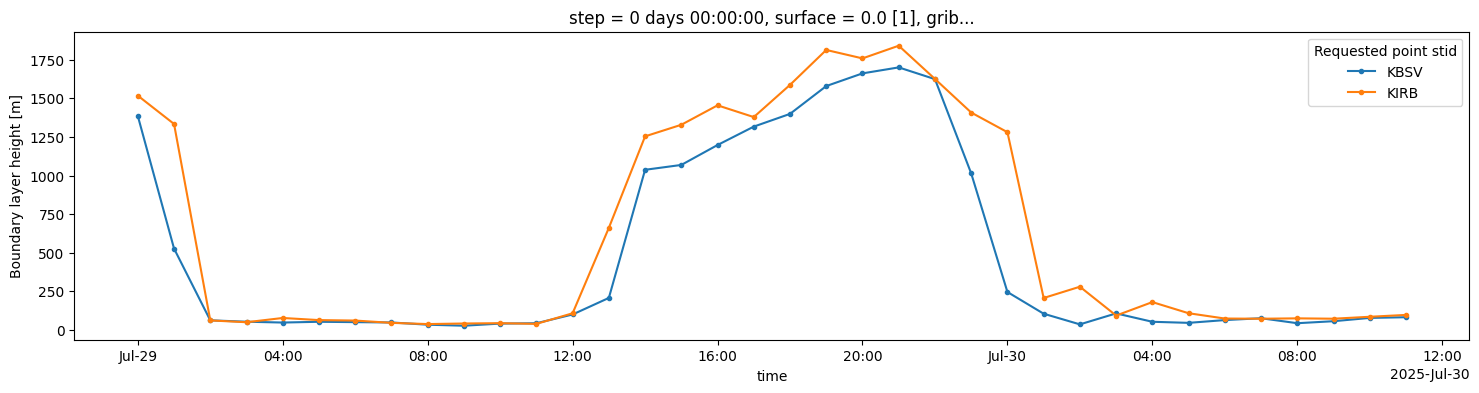

In [ ]:
plt.figure(figsize=[18,4])
bsv_ts = xr.concat(i, dim="valid_time")
bsv_ts.blh.plot(x="valid_time", hue="point_stid", marker=".")
plt.show()